### Consolidacion de los datos

Dado que los datos vienen en hojas separadas, 20 en total, una consolidación de los datos de clientes en un único archivo se hace necesario y tiene las siguientes ventajas:

Facilidad de análisis: Al reunir toda la información en un solo archivo, se facilita la aplicación de técnicas de preprocesamiento y análisis de datos sin la necesidad de procesar múltiples hojas por separado.

Estandarización: Incorporar una columna ID_cliente permite identificar fácilmente a cada cliente, estandarizando el formato de los datos y asegurando que cualquier operación o análisis pueda segmentarse por cliente sin ambigüedades.

Eficiencia: Al trabajar con una tabla consolidada, se reduce el tiempo de ejecución y se simplifican las operaciones en herramientas como Python, R o Power BI. Esto es esencial cuando se realizan transformaciones complejas o cálculos a gran escala.

Preparación para el preprocesamiento: Esta estructura unificada y estandarizada facilita tareas como la detección de valores nulos, transformación de formatos, y normalización, asegurando un preprocesamiento más eficiente y robusto.

Compatibilidad con algoritmos: Muchos algoritmos de Machine Learning requieren una única tabla para realizar predicciones o identificar patrones. Consolidar los datos en este formato simplifica la integración y la implementación de estos modelos.

se procede a la unificación

In [3]:
import pandas as pd

#ruta del archivo 
file_path = "./datos contugas.xlsx"

# se lee  las hojas del archivo
sheets = pd.read_excel(file_path, sheet_name=None)

# se crea un DataFrame vacío para consolidar los datos
all_data = pd.DataFrame()

# ciclo iterativo sobre las hojas y se agrega un identificador para cada cliente
for sheet_name, sheet_data in sheets.items():
    sheet_data['ID_cliente'] = sheet_name  # se usa el nombre de la hoja como identificador
    all_data = pd.concat([all_data, sheet_data], ignore_index=True)

# se guarda en un nuevo archivo consolidado
output_path = "datos_consolidados.xlsx"

data=all_data



### Caracteristicas de calidad en los datos

In [4]:
# se muestra las primeras filas del DataFrame para revisar el formato
data.head()

,Fecha,Presion,Temperatura,Volumen,ID_cliente
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1


In [5]:
data.shape

(847960, 5)

#### Despues de la unificación la base de datos contiene 847960 registros y 5 columnas:

Fecha: Marca temporal asociada al registro fecha y hora.

Presion: Lectura de presión en esa hora en bar.

Temperatura: Lectura de temperatura en grados celsius.

Volumen: Volumen de consumo registrado en metros cubicos

ID_cliente: Identificador que permite rastrear a qué cliente corresponde cada registro.

. 

#### ahora vamos a  verificar que todos los campos (Fecha, Presión, Temperatura, Volumen, ID_cliente) estén completos y no tengan valores nulos o faltanes

In [9]:
# se verifican valores faltantes en cada columna
missing_values = data.isnull().sum()

# se calculan el porcentaje de valores faltantes
missing_percentage = (missing_values / len(data)) * 100

# se crea un DataFrame con los resultados
missing_summary = pd.DataFrame({
    'Columna': data.columns,
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})

# se filtran registros completamente vacíos
vacios = data[data.isnull().all(axis=1)]

# se muesstra
print("Resumen de valores faltantes por columna:")
print(missing_summary)

print("\nNúmero de registros completamente vacíos:", len(vacios))



Resumen de valores faltantes por columna:
                 Columna  Valores Faltantes  Porcentaje (%)
Fecha              Fecha                  0             0.0
Presion          Presion                  0             0.0
Temperatura  Temperatura                  0             0.0
Volumen          Volumen                  0             0.0
ID_cliente    ID_cliente                  0             0.0

Número de registros completamente vacíos: 0


In [10]:
# Identificar columnas que deberían ser numéricas
numeric_columns = ['Presion', 'Temperatura', 'Volumen']

# Verificar si hay valores no numéricos
for column in numeric_columns:
    print(f"Problemas en columna: {column}")
    print(data[~data[column].apply(lambda x: isinstance(x, (int, float)))])

Problemas en columna: Presion
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, ID_cliente]
Index: []
Problemas en columna: Temperatura
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, ID_cliente]
Index: []
Problemas en columna: Volumen
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, ID_cliente]
Index: []


Lo anterior  sugiere que el conjunto de datos está limpio en cuanto a valores faltantes y registros vacíos. Es un punto positivo, ya que no será necesario aplicar imputaciones para tratar valores nulos en este caso.

#### Tipo de datos:



In [11]:
# se revisa los tipos de datos de las columnas
print(data.dtypes)


Fecha          datetime64[ns]
Presion               float64
Temperatura           float64
Volumen               float64
ID_cliente             object
dtype: object


Los tipos de datos parecen adecuados:

Fecha: Está correctamente representada como datetime64[ns], lo que permite realizar análisis temporales, como rangos de fechas y frecuencias.

Presion, Temperatura, Volumen: Son de tipo float64, lo cual es adecuado para realizar cálculos numéricos y análisis estadísticos.

ID_cliente: Es de tipo object, que es el formato esperado para identificadores categóricos.

#### Valores duplicados

In [12]:
# Revisar duplicados únicamente en las columnas clave: Fecha e ID_cliente
duplicados = data[data.duplicated(subset=['Fecha', 'ID_cliente'], keep=False)]


# Mostrar resultados
if not duplicados.empty:
    print(f"Se encontraron {duplicados.shape[0]} registros duplicados basados en Fecha e ID_cliente.")
    display(duplicados)
else:
    print("No se encontraron registros duplicados basados en Fecha e ID_cliente.")

Se encontraron 28 registros duplicados basados en Fecha e ID_cliente.


,Fecha,Presion,Temperatura,Volumen,ID_cliente
43809,2019-01-30 13:00:00,17.659923,29.399669,58.640402,CLIENTE2
43810,2019-01-30 13:00:00,17.650840,28.779720,59.312199,CLIENTE2
54813,2020-07-02 08:00:00,17.624607,27.597346,76.861553,CLIENTE2
54814,2020-07-02 08:00:00,17.561285,27.424904,60.813367,CLIENTE2
54920,2020-07-06 20:00:00,17.618151,25.644360,60.144638,CLIENTE2
54921,2020-07-06 20:00:00,17.647176,27.409190,63.259858,CLIENTE2
55008,2020-07-10 13:00:00,17.592979,26.256285,48.875218,CLIENTE2
55009,2020-07-10 13:00:00,17.588675,26.605402,87.049217,CLIENTE2
55416,2020-07-27 14:00:00,17.643607,26.024056,43.695113,CLIENTE2
55417,2020-07-27 14:00:00,17.629856,23.116481,12.953659,CLIENTE2


Se encontraron registros duplicados que comparten la misma fecha (Fecha) y cliente (ID_cliente). Los clientes con duplicados son el 2, 3, 8, 11, 16 y el 18

Estos duplicados pueden generar sesgos en análisis posteriores, especialmente si las variables Presion, Temperatura y Volumen no coinciden exactamente en los registros duplicados. Esto podría influir en cálculos como promedios o anomalías.

Durante la etapa de limpieza de datos, será necesario definir un criterio claro para manejar estos duplicados, ya sea eliminándolos o consolidándolos mediante técnicas como el promedio o seleccionando uno representativo.

Por ahora, estos duplicados representan un aspecto clave a abordar en el preprocesamiento, pero no limitan la caracterización inicial del dataset.

______

#### se procede con una descripción de los datos para las variables numericas

In [13]:
data.describe()

,Fecha,Presion,Temperatura,Volumen
count,847960,847960.000000,847960.000000,847960.000000
mean,2021-07-08 22:08:19.659418112,16.072957,25.198239,62.328206
min,2019-01-14 00:00:00,2.934873,-5.257899,0.000000
25%,2020-04-13 23:00:00,17.097350,22.693027,0.000000
50%,2021-07-07 06:00:00,17.570449,25.379859,21.773567
75%,2022-10-06 02:15:00,17.694254,27.886244,99.319649
max,2023-12-31 23:00:00,20.307852,50.019853,577.413425
std,NaN,4.186408,3.790497,80.498112


De lo anterior podriamos decir:
    
Presión:

El promedio (mean) es 16.07, con un rango de 2.93 a 20.30.
La desviación estándar (std) es 4.18, indicando cierta variabilidad en los valores.

Temperatura:

El promedio es 25.19, con un rango de -5.26 a 50.01.
La presencia de valores negativos es atípica para una variable de temperatura, lo que podría necesitar revisión, o podria tratarse de ciertos clientes en ciertas zonas.

Volumen:

El promedio es 62.33, con valores que van de 0 a 577.41.
El percentil 25 es 0, lo que significa que el 25% de los registros tienen consumo nulo, algo consistente con el contexto operacional descrito y muy posiblemente relacionado con nada de consumo para ciertos clientes en ciertas fechas o temporadas.

Fecha:

Los datos cubren un rango temporal amplio, del 14 de enero de 2019 al 31 de diciembre de 2023.

los datos anteriores sugieren que hay suficiente información para realizar análisis temporales detallados.




### Histogramas

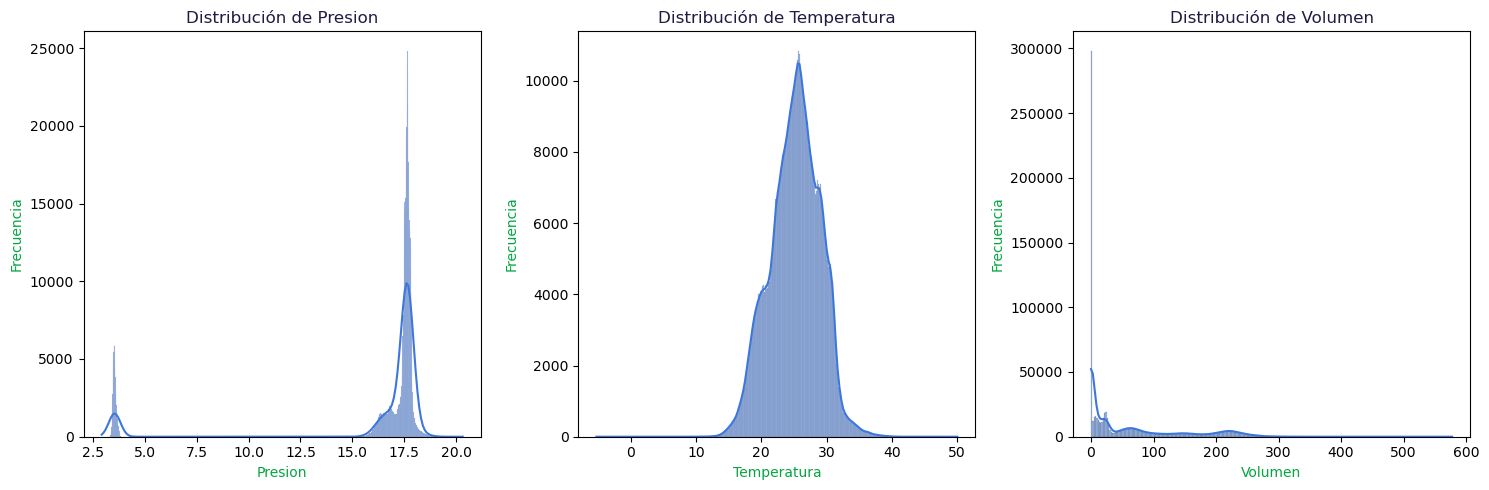

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar %matplotlib inline en Jupyter Notebook
%matplotlib inline

# Colores definidos
colors = {
    "green": "#05a542ff",
    "yellow": "#86d03aff",
    "blue": "#3d77dcff",
    "light_blue": "#29a5dfff",
    "violet": "#231942ff"
}

# Distribución de variables numéricas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
variables = ['Presion', 'Temperatura', 'Volumen']

for i, var in enumerate(variables):
    sns.histplot(data[var], kde=True, color=colors["blue"], ax=axes[i])
    axes[i].set_title(f"Distribución de {var}", color=colors["violet"])
    axes[i].set_xlabel(var, color=colors["green"])
    axes[i].set_ylabel("Frecuencia", color=colors["green"])

plt.tight_layout()
plt.show()

De las anteriores distribuciones de presión, temperatura y volumen. Los histogramas revelaron:

•	Distribuciones normales con ligeros sesgos en temperatura y presión.

•	Volumen presenta una alta concentración cerca de cero, representando clientes con bajo consumo.



#### Valores atipicos

In [15]:
import pandas as pd
import numpy as np

# Crear un DataFrame para almacenar los resultados de los valores atípicos por cliente
outliers_summary = []

# Iterar por cada cliente
for cliente in data['ID_cliente'].unique():
    cliente_data = data[data['ID_cliente'] == cliente]
    
    # Calcular valores atípicos para cada variable numérica
    for variable in ['Presion', 'Temperatura', 'Volumen']:
        Q1 = cliente_data[variable].quantile(0.25)
        Q3 = cliente_data[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar valores atípicos
        outliers = cliente_data[(cliente_data[variable] < lower_bound) | (cliente_data[variable] > upper_bound)]
        
        # Almacenar resultados en una lista
        outliers_summary.append({
            'ID_cliente': cliente,
            'Variable': variable,
            'Outliers': len(outliers)
        })

# Convertir la lista de resultados en un DataFrame
outliers_summary_df = pd.DataFrame(outliers_summary)

outliers_summary_df




,ID_cliente,Variable,Outliers
0,CLIENTE1,Presion,5972
1,CLIENTE1,Temperatura,35
2,CLIENTE1,Volumen,1418
3,CLIENTE2,Presion,6027
4,CLIENTE2,Temperatura,116
5,CLIENTE2,Volumen,1371
6,CLIENTE3,Presion,596
7,CLIENTE3,Temperatura,9
8,CLIENTE3,Volumen,87
9,CLIENTE4,Presion,6279


De lo anterior podriamos decir:

Observaciones:

Clientes con mayor cantidad de valores atípicos:

CLIENTE4 y CLIENTE19 tienen un número significativamente alto de valores atípicos en la variable Presión.

CLIENTE4 y CLIENTE19 también tienen una gran cantidad de valores atípicos en Volumen.

Estos clientes podrían requerir una inspección detallada para verificar si los valores atípicos están asociados con anomalías reales o problemas operativos específicos.

Clientes con pocos valores atípicos: CLIENTE7, CLIENTE12, y CLIENTE16 tienen pocos valores atípicos en general, lo que podría indicar un comportamiento más consistente.

Variables con más valores atípicos:

Presión tiene la mayor cantidad de valores atípicos en casi todos los clientes, lo que podría indicar que la variabilidad en esta variable es significativa en comparación con las otras.

Temperatura tiene relativamente menos valores atípicos, excepto en CLIENTE18, donde tiene un valor inusualmente alto.
Clientes con valores atípicos en cero:

Algunos clientes, como CLIENTE y CLIENTE20, tienen cero valores atípicos en Volumen, lo cual es consistente con clientes que podrían tener consumos esporádicos.



______

Veamos otro enfoque  para atipicos

Identificar valores atípicos en las variables numéricas del conjunto de datos (Presion, Temperatura, Volumen). Este enfoque se centra en detectar valores que se encuentran más allá de 1.5 veces el rango intercuartílico por debajo del primer cuartil (Q1) o por encima del tercer cuartil (Q3).

##### valores atipicos

In [16]:
# Variables numéricas para analizar
numerical_columns = ['Presion', 'Temperatura', 'Volumen']

outliers = {}

# Detectar valores atípicos para cada columna numérica
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"--- {column} ---")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    print(f"Valores atípicos detectados: {len(outliers[column])}")

# Muestra de valores atípicos por cada variable
for column, outlier_data in outliers.items():
    print(f"\nValores atípicos en {column} (muestra):")
    print(outlier_data.head())

--- Presion ---
Límite inferior: 16.201993966437303
Límite superior: 18.589610039429775
Valores atípicos detectados: 105110
--- Temperatura ---
Límite inferior: 14.903200155509015
Límite superior: 35.67607080331149
Valores atípicos detectados: 4420
--- Volumen ---
Límite inferior: -148.97947354377197
Límite superior: 248.2991225729533
Valores atípicos detectados: 19031

Valores atípicos en Presion (muestra):
                    Fecha    Presion  Temperatura    Volumen ID_cliente
40933 2023-09-19 14:00:00  16.169822    26.029502  29.887656   CLIENTE1
41028 2023-09-23 13:00:00  16.167986    26.646485  28.026386   CLIENTE1
41046 2023-09-24 07:00:00  16.198762    25.264265  22.453713   CLIENTE1
41049 2023-09-24 10:00:00  16.200202    25.605162  21.431758   CLIENTE1
41050 2023-09-24 11:00:00  16.190065    25.333624  23.226681   CLIENTE1

Valores atípicos en Temperatura (muestra):
                     Fecha    Presion  Temperatura     Volumen ID_cliente
131495 2019-07-28 14:00:00  17.779333 


Los resultados muestran una cantidad considerable de valores atípicos detectados para las variables Presión, Temperatura y Volumen. Esto puede deberse a:


Errores en los datos: Podrían ser fallos en los dispositivos de medición o problemas en la recopilación de datos.
Eventos excepcionales: Cambios atípicos en las operaciones de los clientes, como interrupciones en el consumo.

Variabilidad natural: Algunos clientes tienen comportamientos más irregulares que otros, lo cual es común en contextos industriales y comerciales. Según el stakeholder de Contugas de la reunon en la semana 5, menciona que ciertos clientes industriales tienen consumos altamente irregulares debido a la naturaleza de sus actividades. Esto implica que algunos de los valores detectados como atípicos podrían no ser errores en los datos ni anomalías técnicas, sino que reflejan comportamientos reales asociados a la operación específica de esos clientes.


dado que son enfoques diferentes uno es por cliente mientras que otro es global, es normal que varien la cantidad de atipicos

#### Analisis de Correlación

Correlación global:
              Presion  Temperatura   Volumen
Presion      1.000000    -0.117926 -0.303625
Temperatura -0.117926     1.000000  0.334410
Volumen     -0.303625     0.334410  1.000000


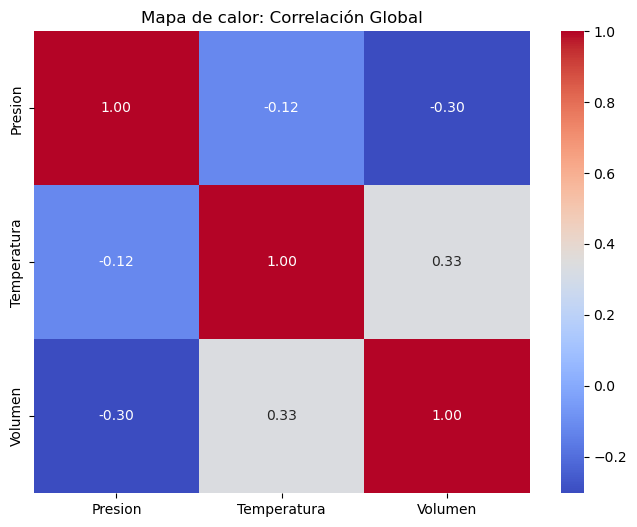

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo de correlación global
correlation_global = data[['Presion', 'Temperatura', 'Volumen']].corr()
print("Correlación global:")
print(correlation_global)

# Mapa de calor para visualización global
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_global, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor: Correlación Global")
plt.show()

# Cálculo de correlación por cliente
correlation_by_client = data.groupby('ID_cliente')[['Presion', 'Temperatura', 'Volumen']].corr()


In [18]:
# se crea un DataFrame vacío para almacenar las correlaciones por cliente
correlations = pd.DataFrame()

# se obtiene la lista de clientes únicos
clientes_unicos = data['ID_cliente'].unique()

# Calcular las correlaciones para cada cliente
for cliente in clientes_unicos:
    cliente_data = data[data['ID_cliente'] == cliente][['Presion', 'Temperatura', 'Volumen']]
    cliente_corr = cliente_data.corr()  # Calcular la correlación
    cliente_corr['ID_cliente'] = cliente  # Añadir el identificador del cliente
    correlations = pd.concat([correlations, cliente_corr])
display(correlations)


,Presion,Temperatura,Volumen,ID_cliente
Presion,1.000000,-0.047996,-0.002282,CLIENTE1
Temperatura,-0.047996,1.000000,0.280288,CLIENTE1
Volumen,-0.002282,0.280288,1.000000,CLIENTE1
Presion,1.000000,0.063640,0.024041,CLIENTE2
Temperatura,0.063640,1.000000,-0.047198,CLIENTE2
Volumen,0.024041,-0.047198,1.000000,CLIENTE2
Presion,1.000000,0.093260,-0.581275,CLIENTE3
Temperatura,0.093260,1.000000,-0.136022,CLIENTE3
Volumen,-0.581275,-0.136022,1.000000,CLIENTE3
Presion,1.000000,-0.082990,0.009146,CLIENTE4


Lo anterior refleja las correlaciones entre las variables principales (Presion, Temperatura y Volumen) tanto a nivel global como a nivle de cliente Esto es útil para evaluar relaciones potenciales entre las variables y cómo estas pueden influir en el comportamiento de los datos.

Observaciones generales:

#### Correlación Global:

Presion y Temperatura: Correlación negativa débil (-0.12), lo que indica que no tienen una relación fuerte en general.

Presion y Volumen: Correlación negativa moderada (-0.30), podría haber cierta relación inversa que varíe según el cliente.

Temperatura y Volumen: Correlación positiva moderada (0.33), sugiriendo que a mayores temperaturas podría haber un ligero aumento en el volumen.

#### Correlacion por cliente:


#### Correlaciones entre Presión y Volumen:

En la mayoría de los casos, esta correlación es negativa, sugiere que, para algunos clientes, a medida que la presión aumenta, el volumen tiende a disminuir y viceversa.

Ejemplo notable: CLIENTE8 (-0.8816), donde la correlación negativa es muy fuerte.

#### Correlaciones entre Temperatura y Volumen:

En varios casos, esta correlación es positiva, lo que indica que los aumentos de temperatura tienden a estar relacionados con incrementos en el volumen.

Ejemplo notable: CLIENTE12 (0.7767), con una fuerte correlación positiva.

#### Correlaciones entre Presión y Temperatura:

Generalmente, las correlaciones entre estas dos variables son bajas, tanto positivas como negativas, lo que indica poca dependencia directa entre ambas.

Ejemplo notable: CLIENTE8 (-0.4977), con una correlación negativa moderada.

Observaciones por Cliente:

CLIENTE1: Todas las correlaciones son débiles, indicando relaciones no significativas entre las variables.

CLIENTE8 y CLIENTE16: Tienen patrones claros de correlaciones fuertes, especialmente una correlación negativa entre Presión y Volumen y una correlación positiva entre Temperatura y Volumen.

CLIENTE17 y CLIENTE18: Muestran relaciones casi independientes (correlaciones cercanas a 0), lo que podría indicar comportamientos aleatorios entre las variables.


#### Patrones Heterogéneos:

Cada cliente tiene relaciones únicas entre las variables, lo que sugiere que los patrones de consumo y operación son específicos de cada caso.

Esto refuerza la necesidad de modelar anomalías o patrones por cliente en lugar de utilizar un modelo global.

Correlaciones Fuertes como Indicadores:

Clientes como CLIENTE8 y CLIENTE16, con correlaciones significativas, podrían presentar patrones más predecibles, útiles para modelos específicos de detección de anomalías.

Clientes con Correlaciones Débiles:

Clientes como CLIENTE1 y CLIENTE19 pueden requerir análisis adicionales para entender qué factores externos o internos están influyendo en su comportamiento.





_______

#### Volumen por cliente:

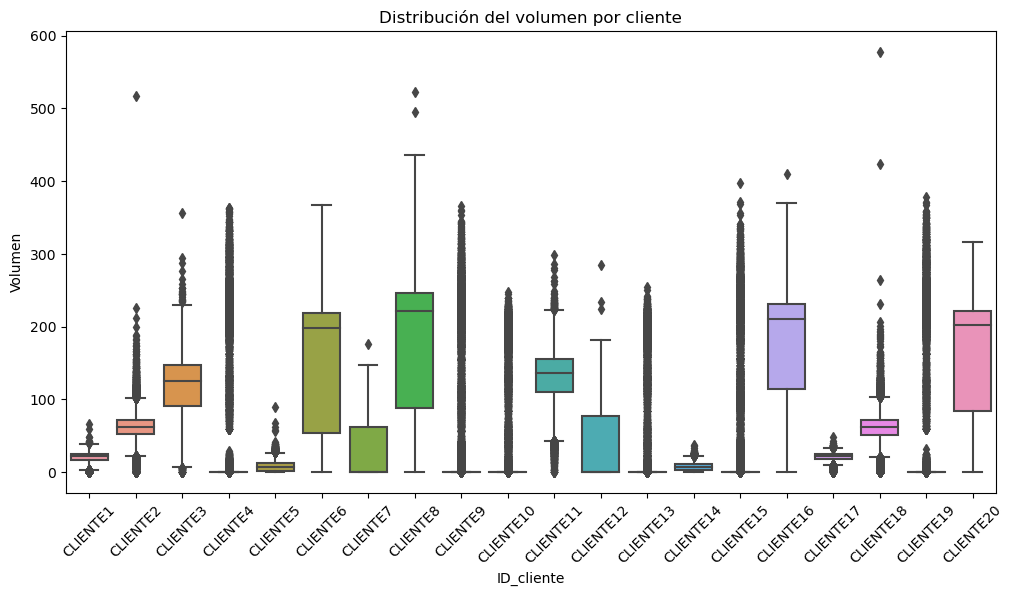

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# se visualiza distribución de volumen por cliente con etiquetas rotadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='ID_cliente', y='Volumen')
plt.title("Distribución del volumen por cliente")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()




El gráfico anterior muestra la distribución de volumen por cliente y resalta algunas observaciones interesantes:

#### Clientes con gran dispersión (alta variabilidad):

CLIENTE5 y CLIENTE8 tienen una dispersión muy amplia en los datos de volumen. Esto indica que hay clientes con patrones de consumo muy variados, incluyendo valores extremos.

Clientes con valores atípicos evidentes:

CLIENTE1, CLIENTE2 y CLIENTE16 presentan valores atípicos significativos que pueden indicar anomalías o eventos fuera de lo común en su consumo.

Clientes con consumo más homogéneo:

CLIENTE6 y CLIENTE7 tienen un rango más estrecho de consumo, lo que sugiere un comportamiento más consistente.
Tendencias de Consumo por Cliente



CLIENTE4, CLIENTE9, CLIENTE10, CLIENTE13, CLIENTE15, y CLIENTE19: es evidente que algunos clientes tienen consumos con mediana cercana a cero o cero, muy probable que estos clientes correspondan a aquellos casos donde se destacan comportamientos de consumo irregulares y no a datos faltantes. Varias razones apoyan esta hipótesis:

Valores atípicos significativos:

Los clientes mencionados presentan valores extremos en sus consumos de volumen. Según el stakeholder, los clientes industriales y comerciales tienden a tener comportamientos diversos e inciertos, lo que encaja con estas observaciones.

Variabilidad alta en el volumen:

Los patrones de consumo de estos clientes muestran una dispersión significativa, lo que es típico en industrias con demandas fluctuantes debido a ciclos operativos, producción o eventos específicos.

Relación con anomalías:

El stakeholder destacó que estos clientes podrían experimentar anomalías como fallos en medidores, eventos operativos no registrados o incluso posibles fraudes. Los valores extremos observados pueden ser indicativos de estos problemas.

Falta de patrones generales:

Según el stakeholder, no es posible aplicar reglas generales para todos los clientes. Estos casos refuerzan esta afirmación, ya que requieren un análisis detallado y específico para entender sus comportamientos.

#### Presion por cliente

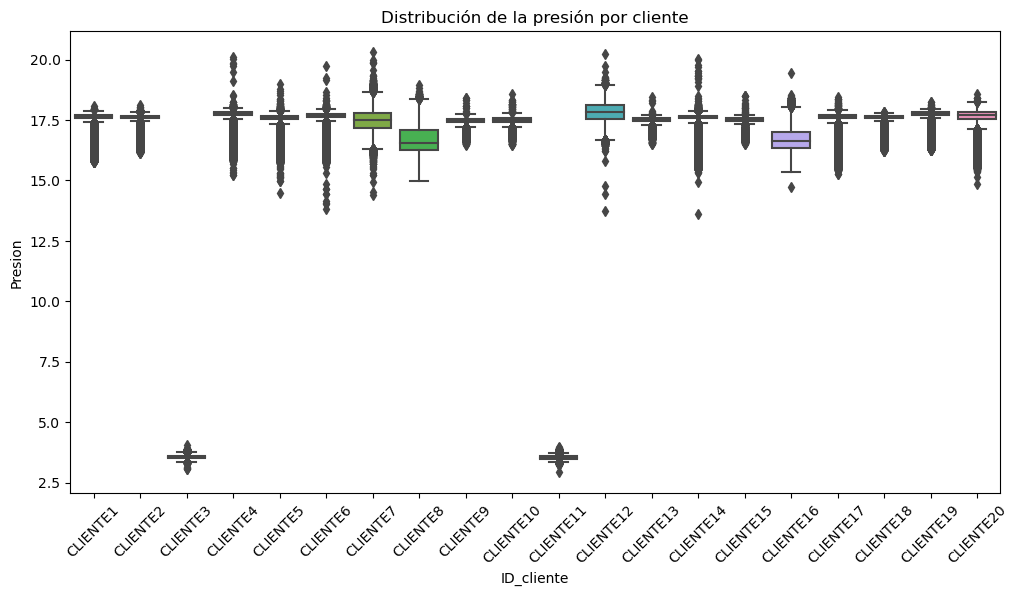

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de la presión por cliente
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='ID_cliente', y='Presion')
plt.title("Distribución de la presión por cliente")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X
plt.show()



La anterior gráfica muestra la distribución de la presión por cliente, y podemos observar varias características interesantes:

Clientes con mayor variabilidad de presión: 

Algunos clientes presentan una mayor dispersión en los datos de presión, como CLIENTE4, CLIENTE5, y CLIENTE9. Esto podría indicar condiciones operativas diferentes o inestabilidad en los registros de medición.

Clientes con valores de presión atípicos:

CLIENTE3 y CLIENTE11 tienen valores significativamente bajos de presión, lo anterior podría estar relacionado con fallas en los medidores, eventos operativos o posibles problemas en el sistema.

CLIENTE8 presenta valores atípicos altos en comparación con otros clientes.

Clientes con rangos más estables: Algunos clientes, como CLIENTE1, CLIENTE2, y CLIENTE20, muestran una distribución más concentrada y menos dispersa, lo que podría reflejar un comportamiento operativo más uniforme o estable.


Diferencias entre clientes: Estas variaciones sugieren que la presión puede ser un indicador clave para identificar patrones anómalos en ciertos clientes o condiciones operativas específicas.

#### Temperatura por Cliente

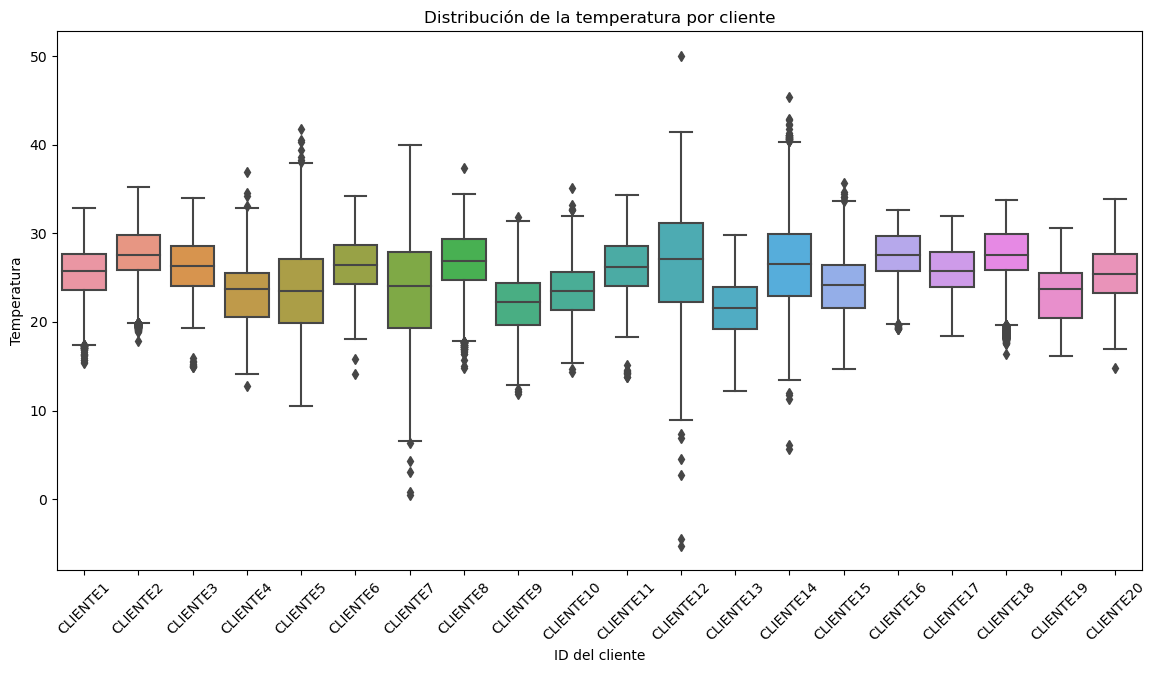

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de distribución de temperatura por cliente
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='ID_cliente', y='Temperatura')
plt.title("Distribución de la temperatura por cliente")
plt.xticks(rotation=45)
plt.ylabel("Temperatura")
plt.xlabel("ID del cliente")
plt.show()

El anterior gráfico muestra la distribución de las temperaturas por cliente.

Clientes con rangos amplios de temperatura:

Algunos clientes, como CLIENTE7 y CLIENTE12, presentan un rango considerablemente amplio de temperatura, indicando una mayor variabilidad en sus mediciones, tienen registros de temperatura significativamente bajos, lo que podría representar situaciones inusuales o incluso errores en la medición.

Clientes con temperaturas bajas:


Clientes con menor variabilidad:

Algunos clientes, como CLIENTE3 y CLIENTE8, tienen una menor variabilidad en sus temperaturas, lo que sugiere un comportamiento más estable.

Valores atípicos:

En varios clientes, se observan valores atípicos extremos, como temperaturas muy bajas cercanas a 0 o incluso negativas, y temperaturas muy altas que podrían necesitar respuesta de stakeholder de Contugas.

Dado que la temperatura es una variable importante para determinar el comportamiento del consumo y detectar anomalías, sería útil analizar en detalle a los clientes con registros extremos (bajas o altas temperaturas) y evaluar si estos valores están relacionados con condiciones específicas, errores o comportamientos reales. Esto podría proporcionar más información sobre posibles patrones de operación anómalos.

___________

####  Análisis de Estacionalidad

Por mes

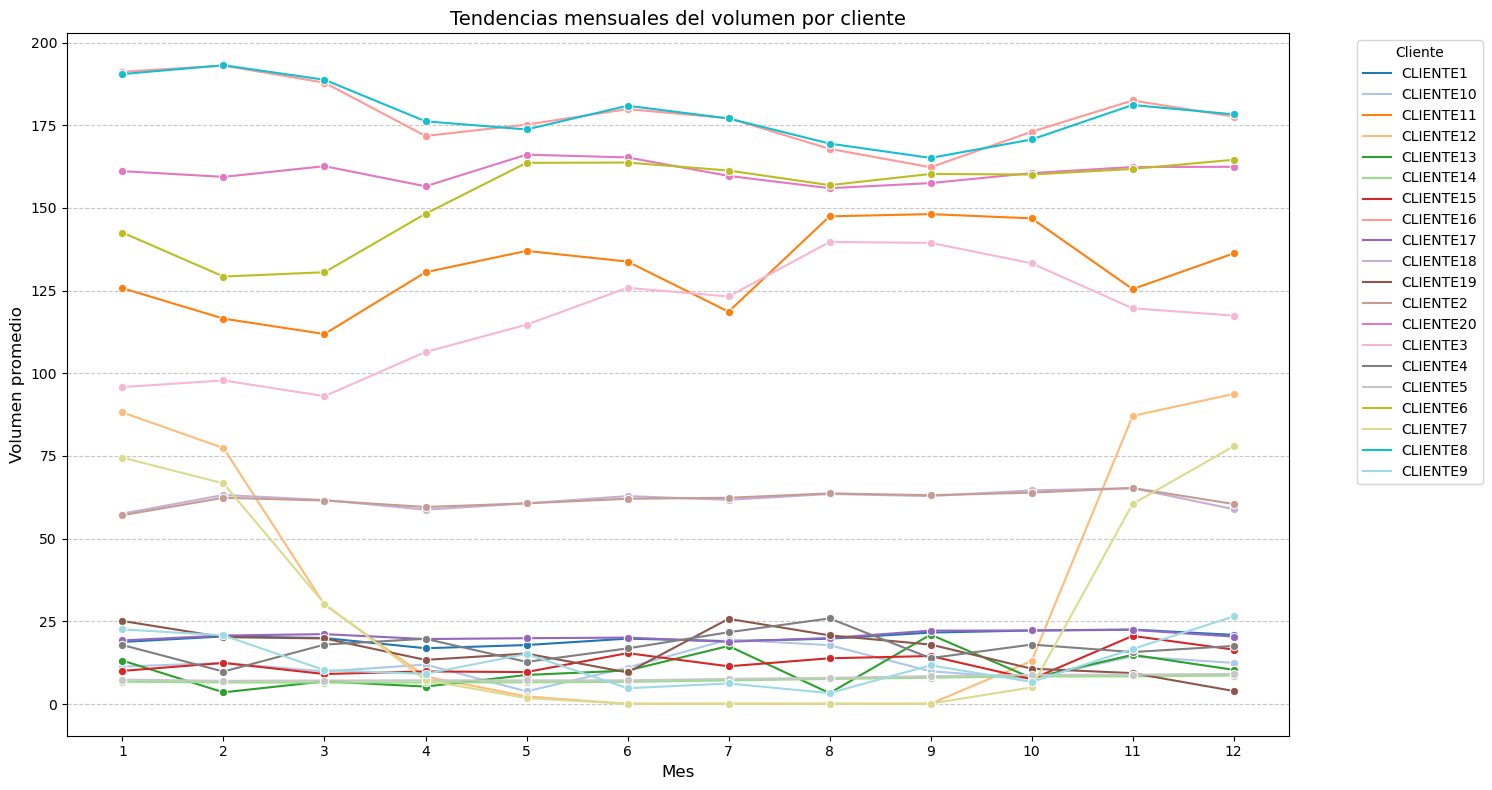

In [24]:
data['Mes'] = data['Fecha'].dt.month
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupamos los datos por cliente y mes
monthly_trends = data.groupby(['ID_cliente', 'Mes'])['Volumen'].mean().reset_index()

# Configuramos la visualización
plt.figure(figsize=(15, 8))

# Creamos un gráfico de líneas para cada cliente
sns.lineplot(data=monthly_trends, x='Mes', y='Volumen', hue='ID_cliente', marker='o', palette='tab20', legend='brief')

# Personalizamos el gráfico
plt.title('Tendencias mensuales del volumen por cliente', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Volumen promedio', fontsize=12)
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))

# Mostramos el gráfico
plt.tight_layout()
plt.show()

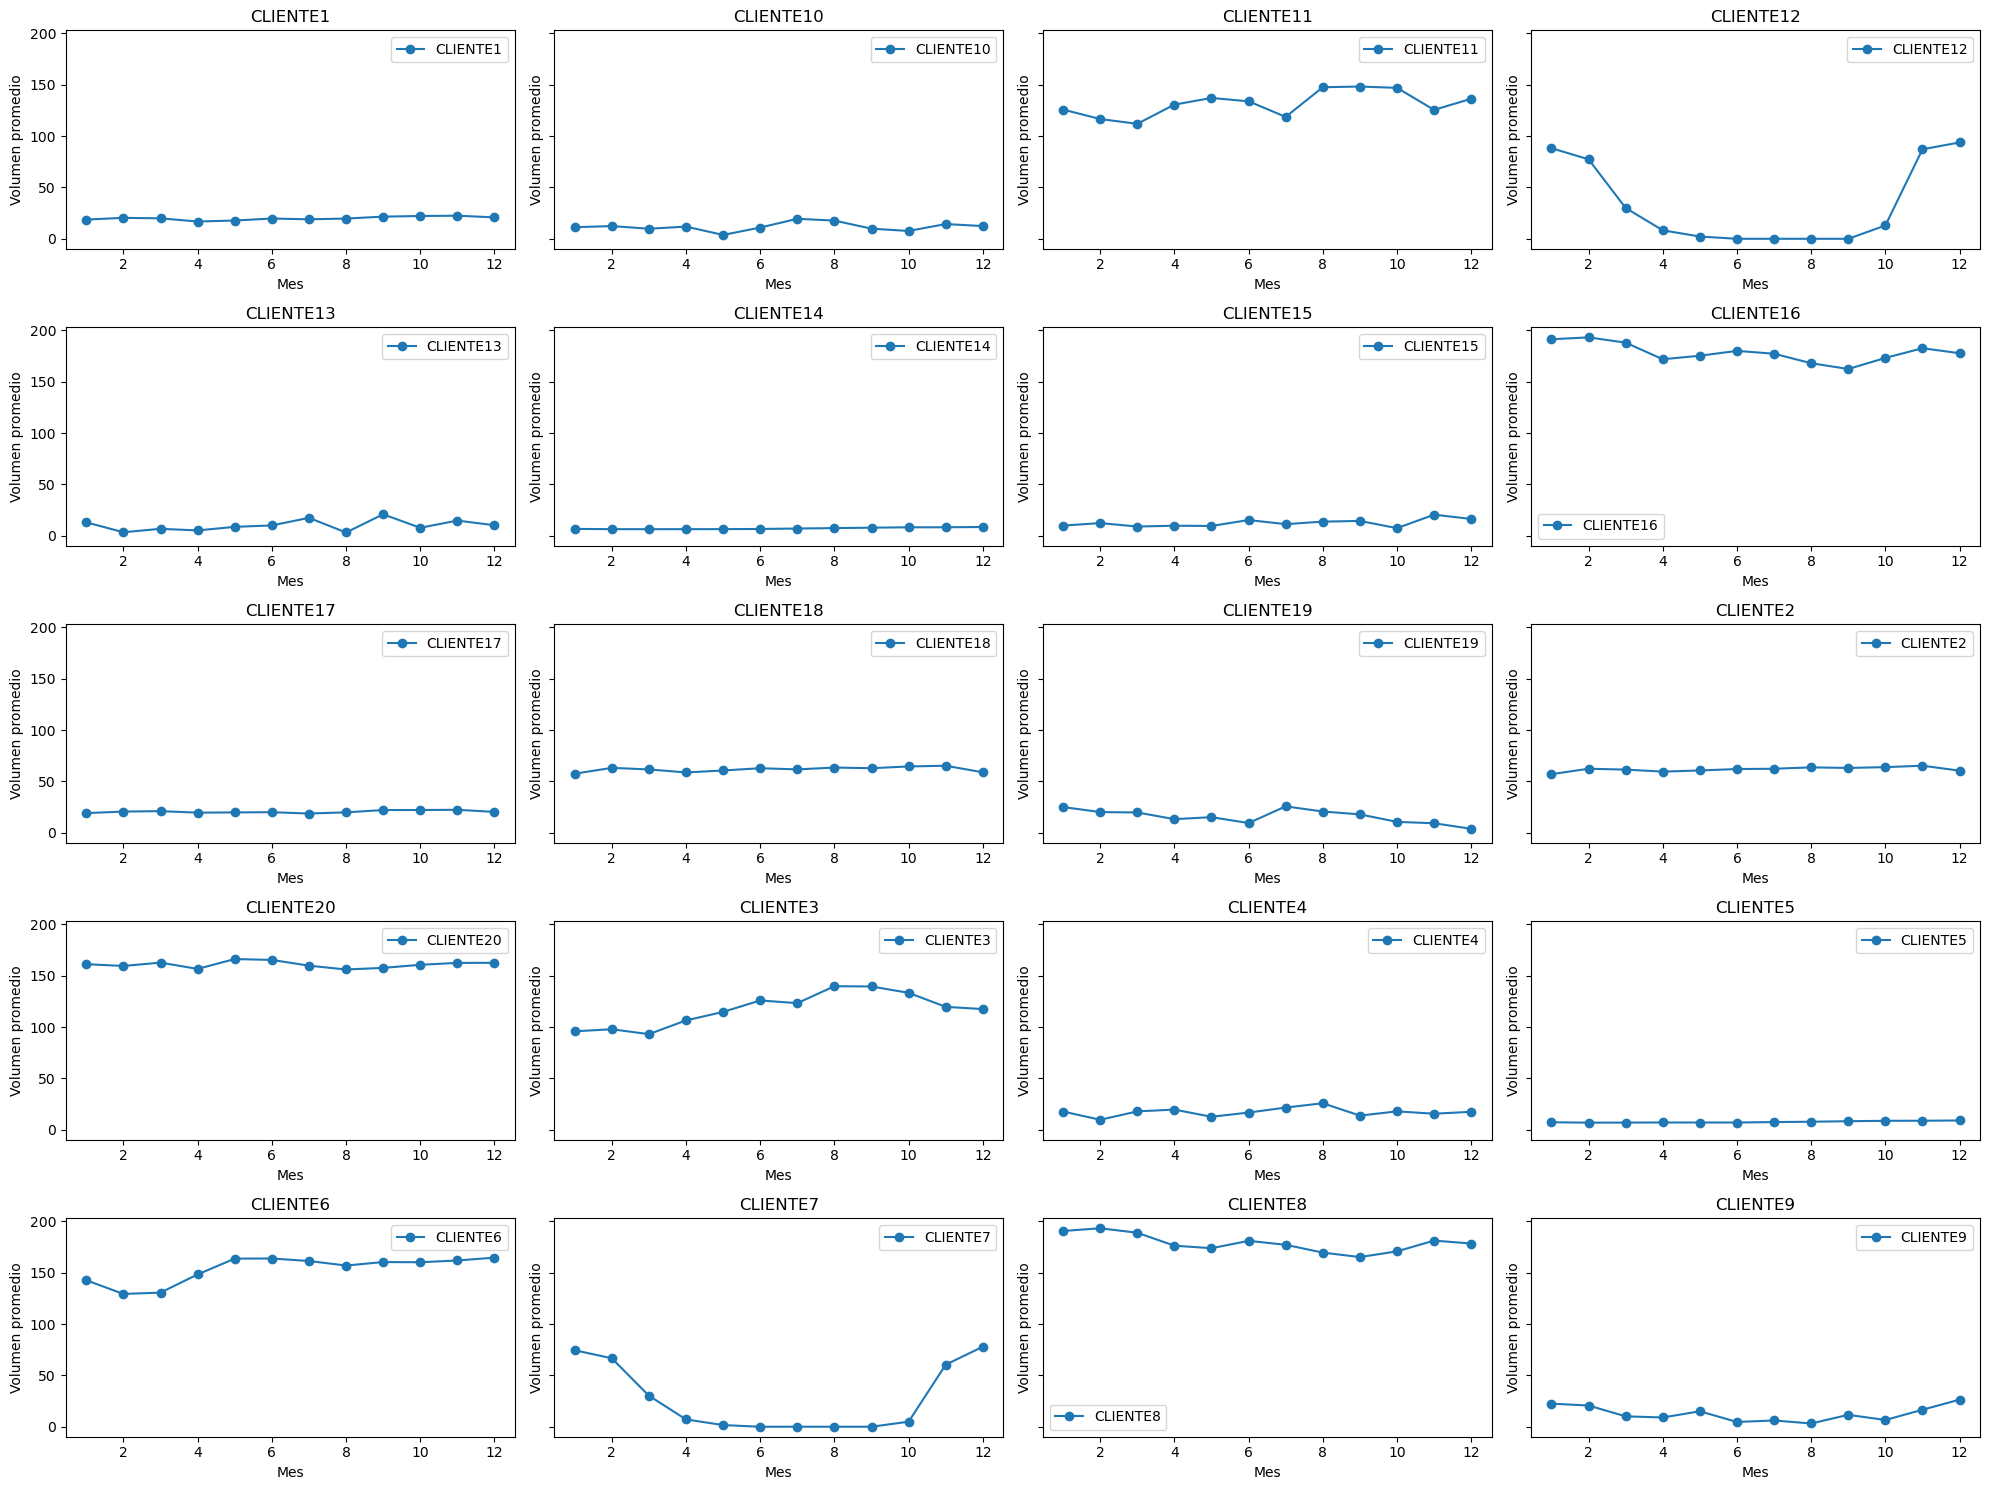

In [25]:
import matplotlib.pyplot as plt

# Asegúrate de calcular las tendencias promedio mensuales por cliente
tendencias = data.groupby(['ID_cliente', 'Mes'])['Volumen'].mean().reset_index()

# Lista de clientes únicos
clientes_unicos = tendencias['ID_cliente'].unique()

# Crear subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15), sharey=True)  # Ajustar el tamaño para mayor claridad
axes = axes.flatten()

# Graficar para cada cliente
for idx, cliente in enumerate(clientes_unicos):
    cliente_data = tendencias[tendencias['ID_cliente'] == cliente]
    axes[idx].plot(cliente_data['Mes'], cliente_data['Volumen'], marker='o', label=cliente)
    axes[idx].set_title(cliente)
    axes[idx].set_xlabel('Mes')
    axes[idx].set_ylabel('Volumen promedio')
    axes[idx].legend()
    
# Ajustar diseño
plt.tight_layout()
plt.show()

dado el grafico lo podemos dividir en varios comportamientos:
    


Clientes con altos volúmenes promedio:

Algunos clientes como CLIENTE11, CLIENTE16, CLIENTE20 CLIENTE8 destacan con volúmenes promedio consistentemente altos en todos los meses, estos clientes podrían pertenecer a sectores industriales con consumos elevados.

Clientes con variabilidad notable:

CLIENTE6, CLIENTE3, CLIENTE9 muestra un aumento considerable en los últimos meses del año, lo que podría indicar un cambio estacional o un patrón relacionado con la operación del cliente.

Clientes con consumos bajos y estables:

CLIENTE1, CLIENTE14, CLIENTE17, CLIENTE5 tienen volúmenes promedio consistentemente bajos y con poca variabilidad mensual.
Esto podría representar clientes domésticos o comerciales pequeños.

Patrones estacionales posibles:

Algunos clientes presentan picos o caídas específicas en meses concretos, como CLIENTE12 y CLIENTE7, lo que podría relacionarse con temporadas altas o bajas en su operación.

Clientes con comportamientos irregulares o atípicos:

CLIENTE10, CLIENTE11, CLIENTE13, CLIENTE15, CLIENTE19, CLIENTE4





_________


#### Conclusión sobre las Características de Calidad de los Datos


Tras un análisis detallado, se puede concluir lo siguiente respecto a las características de calidad de los datos y su concordancia con el problema de negocio planteado:

##### 1. Totalidad de los Datos

Los datos incluyen registros para 20 clientes, consolidando un total de 847,960 observaciones en un período continuo de tiempo.
No se encontraron valores faltantes en las columnas principales (Fecha, Presión, Temperatura, Volumen e ID_cliente).
Sin embargo, se identificaron duplicados en fechas y horas específicas para algunos clientes, los cuales deberán ser abordados en la etapa de limpieza.

La totalidad de los datos parece adecuada para el análisis, abarcando la información necesaria para cumplir con los objetivos del problema de negocio. Sin embargo, los registros duplicados podrían sesgar los resultados si no son tratados adecuadamente.

##### 2. Consistencia

Los tipos de datos están correctamente definidos (e.g., datetime para la Fecha y float64 para las variables numéricas).
Se identificaron valores atípicos significativos en las tres variables principales (Presión, Temperatura, Volumen) que varían considerablemente entre los clientes.

La correlación entre variables globalmente muestra coherencia, pero algunos clientes presentan comportamientos inconsistentes o anómalos.

Aunque las variables presentan consistencia en su formato, la presencia de valores atípicos y patrones irregulares sugiere posibles anomalías operativas que deberán ser investigadas más a fondo. Estos valores, lejos de ser descartados, podrían ser útiles para la detección de comportamientos inusuales.

##### 3. Claridad

Las variables están bien definidas y no presentan ambigüedad en su interpretación. Se incluyó un identificador único (ID_cliente) para cada cliente, facilitando el análisis segmentado.

Los valores de "0" en la variable Volumen fueron confirmados como comportamientos válidos y no como datos faltantes.

Los datos son claros en su significado y estructura, permitiendo una interpretación sencilla que apoya los objetivos del problema.

##### 4. Formato

Los datos fueron consolidados desde 20 hojas individuales en un solo archivo, asegurando la estandarización en un único DataFrame.

La columna Fecha se procesó adecuadamente, permitiendo descomponerla en componentes útiles como Mes y Hora para análisis temporales.

El formato es adecuado para su uso en herramientas analíticas y para la aplicación de técnicas de Machine Learning.

##### 5. Concordancia con el Problema de Negocio


El análisis identificó clientes con patrones atípicos o irregulares, alineándose con la necesidad de Contugas de detectar anomalías específicas por cliente. Los datos permiten investigar patrones estacionales y de periodicidad, cruciales para modelar comportamientos operativos y detectar inconsistencias.

Los datos disponibles son congruentes con los objetivos planteados. Sin embargo, será fundamental abordar las inconsistencias encontradas (duplicados y valores atípicos) en la etapa de limpieza para garantizar resultados confiables.





### Proceso de Limpieza

#### Análisis de los duplicados

Tecnica:
Promedio: Para columnas numéricas (Presion, Temperatura, Volumen), se va a calcular el promedio de los valores duplicados y quedar con un único registro.


Código para resolver duplicados

In [27]:
data=data.drop(["Mes"], axis=1)
data

,Fecha,Presion,Temperatura,Volumen,ID_cliente
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1
...,...,...,...,...,...
847955,2023-12-31 19:00:00,15.751139,27.460652,204.457549,CLIENTE20
847956,2023-12-31 20:00:00,15.614858,27.010382,186.512096,CLIENTE20
847957,2023-12-31 21:00:00,15.598944,26.709100,204.456461,CLIENTE20
847958,2023-12-31 22:00:00,15.730040,27.266090,203.695596,CLIENTE20


In [28]:
# se promedian valores numéricos para registros duplicados
data_resuelto = (
    data.groupby(['Fecha', 'ID_cliente'], as_index=False)
    .agg({
        'Presion': 'mean',        # Promedia la columna Presion
        'Temperatura': 'mean',   # Promedia la columna Temperatura
        'Volumen': 'mean'        # Promedia la columna Volumen
    })
)
data=data_resuelto
display(data)
print(f"Se eliminaron los duplicados'.")

,Fecha,ID_cliente,Presion,Temperatura,Volumen
0,2019-01-14 00:00:00,CLIENTE1,17.732563,28.209354,20.969751
1,2019-01-14 00:00:00,CLIENTE10,17.534622,25.958163,0.000000
2,2019-01-14 00:00:00,CLIENTE11,3.625672,27.554214,88.443881
3,2019-01-14 00:00:00,CLIENTE12,17.286238,32.363057,110.898742
4,2019-01-14 00:00:00,CLIENTE13,17.528430,25.212319,0.000000
...,...,...,...,...,...
847941,2023-12-31 23:00:00,CLIENTE5,15.849333,22.762741,11.417578
847942,2023-12-31 23:00:00,CLIENTE6,15.686217,25.195488,139.281649
847943,2023-12-31 23:00:00,CLIENTE7,16.432172,29.152388,71.848853
847944,2023-12-31 23:00:00,CLIENTE8,15.658679,29.399192,234.409474


Se eliminaron los duplicados'.


Explicación de la tecnica

Agrupación por Fecha e ID_cliente:

groupby(['Fecha', 'ID_cliente']) asegura que cada combinación única de Fecha e ID_cliente tenga un solo registro.

Agregación con el promedio:

El método .agg({'columna': 'mean'}) calcula el promedio de las columnas Presion, Temperatura y Volumen para las filas duplicadas.

Conservación de la estructura: El parámetro as_index=False asegura que las columnas Fecha e ID_cliente no se conviertan en índices, sino que permanezcan como columnas normales.

Ahora verificamos que no tengamos duplicados


In [29]:
# se revisa duplicados únicamente en las columnas clave: Fecha e ID_cliente
duplicados = data[data.duplicated(subset=['Fecha', 'ID_cliente'], keep=False)]


# se muestra
if not duplicados.empty:
    print(f"Se encontraron {duplicados.shape[0]} registros duplicados basados en Fecha e ID_cliente.")
    display(duplicados)
else:
    print("No se encontraron registros duplicados basados en Fecha e ID_cliente.")

No se encontraron registros duplicados basados en Fecha e ID_cliente.


#### Tratamiento de Atipicos

Los valores atípicos no siempre deben eliminarse, especialmente en un contexto como este, donde el análisis de anomalías es parte del objetivo principal. Los valores atípicos pueden proporcionar información clave sobre comportamientos inusuales o potenciales problemas operativos, como fraudes o fallas en equipos.

En este caso, conservar los valores atípicos tiene varias ventajas:

Detección de anomalías: Estos valores son esenciales para identificar patrones o comportamientos irregulares que podrían ser críticos para el análisis del cliente.

Concordancia con el problema de negocio: Dado que el objetivo es entender y posiblemente prever comportamientos inusuales, eliminar los atípicos podría llevar a perder información relevante.

En lugar de eliminar, se podrian clasificar para analizarlos con más detalle en etapas posteriores.

In [30]:
# variables numéricas
variables_numericas = ['Presion', 'Temperatura', 'Volumen']

# copiar el DataFrame original
data_etiquetado = data.copy()

# iterar sobre las variables numéricas para etiquetar atípicos
for variable in variables_numericas:
    Q1 = data_etiquetado[variable].quantile(0.25)
    Q3 = data_etiquetado[variable].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # se crea la columna de etiqueta para cada variable
    data_etiquetado[f"{variable}_atipico"] = (
        (data_etiquetado[variable] < limite_inferior) | 
        (data_etiquetado[variable] > limite_superior)
    ).astype(int)

# se crea una columna global para identificar si un registro es atípico en cualquier variable
data_etiquetado['Es_atipico'] = data_etiquetado[[f"{var}_atipico" for var in variables_numericas]].max(axis=1)

# se muestra
display(data_etiquetado)


,Fecha,ID_cliente,Presion,Temperatura,Volumen,Presion_atipico,Temperatura_atipico,Volumen_atipico,Es_atipico
0,2019-01-14 00:00:00,CLIENTE1,17.732563,28.209354,20.969751,0,0,0,0
1,2019-01-14 00:00:00,CLIENTE10,17.534622,25.958163,0.000000,0,0,0,0
2,2019-01-14 00:00:00,CLIENTE11,3.625672,27.554214,88.443881,1,0,0,1
3,2019-01-14 00:00:00,CLIENTE12,17.286238,32.363057,110.898742,0,0,0,0
4,2019-01-14 00:00:00,CLIENTE13,17.528430,25.212319,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...
847941,2023-12-31 23:00:00,CLIENTE5,15.849333,22.762741,11.417578,1,0,0,1
847942,2023-12-31 23:00:00,CLIENTE6,15.686217,25.195488,139.281649,1,0,0,1
847943,2023-12-31 23:00:00,CLIENTE7,16.432172,29.152388,71.848853,0,0,0,0
847944,2023-12-31 23:00:00,CLIENTE8,15.658679,29.399192,234.409474,1,0,0,1


De lo anterior podemos decir:

Se mantienen los datos completos: No se elimina información valiosa.

Fácil análisis posterior: se puede filtrar y analizar específicamente los registros atípicos.

Preparación para modelado: La columna Es_atipico puede usarse como una característica para entrenar modelos supervisados o no supervisados que analicen el comportamiento de los clientes.

#### Verificacion de formatos

In [31]:
# Verificar los tipos de datos de las columnas
print("Tipos de datos actuales:")
print(data.dtypes)

# Revisar las columnas de tipo object en busca de inconsistencias
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nValores únicos en la columna '{col}':")
    print(data[col].unique())

# Verificar la columna 'Fecha' (si es tipo datetime)
if pd.api.types.is_datetime64_any_dtype(data['Fecha']):
    print("\nLa columna 'Fecha' tiene el formato correcto (datetime).")
else:
    print("\nLa columna 'Fecha' NO está en formato datetime. Intentando convertir...")
    data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
    print("Formato actualizado para la columna 'Fecha'.")

# Identificar valores no convertibles (NaT) tras la conversión
if data['Fecha'].isna().sum() > 0:
    print("\nExisten valores no válidos en la columna 'Fecha':")
    print(data[data['Fecha'].isna()])
else:
    print("\nNo se encontraron valores no válidos en la columna 'Fecha'.")

Tipos de datos actuales:
Fecha          datetime64[ns]
ID_cliente             object
Presion               float64
Temperatura           float64
Volumen               float64
dtype: object

Valores únicos en la columna 'ID_cliente':
['CLIENTE1' 'CLIENTE10' 'CLIENTE11' 'CLIENTE12' 'CLIENTE13' 'CLIENTE14'
 'CLIENTE15' 'CLIENTE16' 'CLIENTE17' 'CLIENTE18' 'CLIENTE19' 'CLIENTE2'
 'CLIENTE20' 'CLIENTE3' 'CLIENTE4' 'CLIENTE5' 'CLIENTE6' 'CLIENTE7'
 'CLIENTE8' 'CLIENTE9']

La columna 'Fecha' tiene el formato correcto (datetime).

No se encontraron valores no válidos en la columna 'Fecha'.


Dado lo anterior, como ya se habia evidenciado antes:

No es necesario realizar ajustes adicionales en los formatos. 

#### Conclusion etapa de limpieza

La etapa de limpieza de datos se completó exitosamente, asegurando que los datos estén en un estado adecuado para el análisis y modelado futuro.

Duplicados:

Se identificaron y resolvieron registros duplicados en las columnas clave Fecha e ID_cliente mediante la agregación de valores numéricos (promedio) para las entradas duplicadas. Posteriormente, se verificó que no quedaran duplicados en el conjunto de datos.

Valores atípicos:

Se realizó un análisis detallado de valores atípicos para las variables Presion, Temperatura y Volumen.
En lugar de eliminar los valores atípicos, se decidió etiquetarlos con nuevas columnas (Presion_atipico, Temperatura_atipico, Volumen_atipico) y se agregó una columna adicional Es_atipico para identificar registros donde al menos una variable es atípica.
Esta decisión permitirá conservar los valores extremos para análisis específicos o posteriores decisiones de negocio.

Formatos de columnas:

La columna Fecha fue confirmada en formato datetime, y no se encontraron valores no válidos.

Las columnas numéricas (Presion, Temperatura, Volumen) están correctamente definidas como float64.

La columna categórica ID_cliente fue verificada, y no se encontraron inconsistencias en sus valores.
Consistencia y claridad:

El conjunto de datos consolidado contiene 847,946 registros y cinco columnas principales (Fecha, Presion, Temperatura, Volumen, ID_cliente), con formatos y valores consistentes.

El conjunto está listo para ser utilizado en análisis exploratorios y modelado sin requerir pasos adicionales de limpieza.




________

### Proceso de entendimiento de datos

Clustering o agrupamiento

"Agrupar a los clientes con consumos similares" apunta directamente a técnicas de clustering, ya que estas permiten identificar patrones y subgrupos homogéneos en los datos. Este enfoque puede revelar información clave sobre los clientes, como:

Tendencias de consumo por grupo.

Identificación de perfiles de clientes con comportamientos similares.

Información para personalizar estrategias o acciones específicas para cada grupo.



Variables a considerar para el clustering:

Volumen: como variable principal de consumo.

Presion y Temperatura: pueden aportar contexto adicional al comportamiento del cliente.

Preprocesamiento para clustering:

Escalado de variables numéricas (Presion, Temperatura, Volumen) para que todas tengan igual peso en el análisis.

Algoritmo sugerido:

K-Means: Es fácil de interpretar y adecuado para identificar grupos iniciales.

Visualización de resultados:

Gráficos de dispersión por pares de variables (Volumen vs. Presion, etc.) con los grupos identificados.


___________

#### Empezamos definiendo el numero de clusters

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\clust

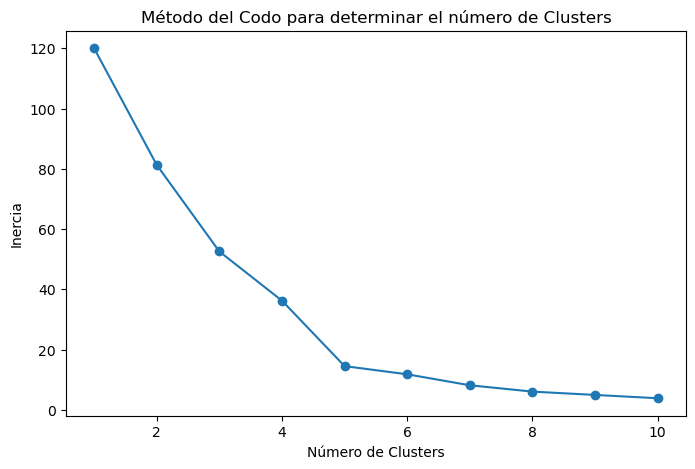

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


# Seleccionar las columnas para clustering (usando estadísticas agregadas por cliente)
agg_data = data.groupby('ID_cliente').agg({
    'Presion': ['mean', 'std'],
    'Temperatura': ['mean', 'std'],
    'Volumen': ['mean', 'std']
}).reset_index()

# Aplanar los nombres de columnas
agg_data.columns = ['ID_cliente', 'Presion_mean', 'Presion_std', 'Temperatura_mean', 'Temperatura_std', 'Volumen_mean', 'Volumen_std']

# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(agg_data.iloc[:, 1:])

# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método del Codo para determinar el número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()



Asignación de clusters:
   ID_cliente  Cluster
0    CLIENTE1        2
1   CLIENTE10        1
2   CLIENTE11        3
3   CLIENTE12        1
4   CLIENTE13        1
5   CLIENTE14        2
6   CLIENTE15        1
7   CLIENTE16        0
8   CLIENTE17        2
9   CLIENTE18        2
10  CLIENTE19        1
11   CLIENTE2        2
12  CLIENTE20        0
13   CLIENTE3        3
14   CLIENTE4        1
15   CLIENTE5        1
16   CLIENTE6        0
17   CLIENTE7        1
18   CLIENTE8        0
19   CLIENTE9        1


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


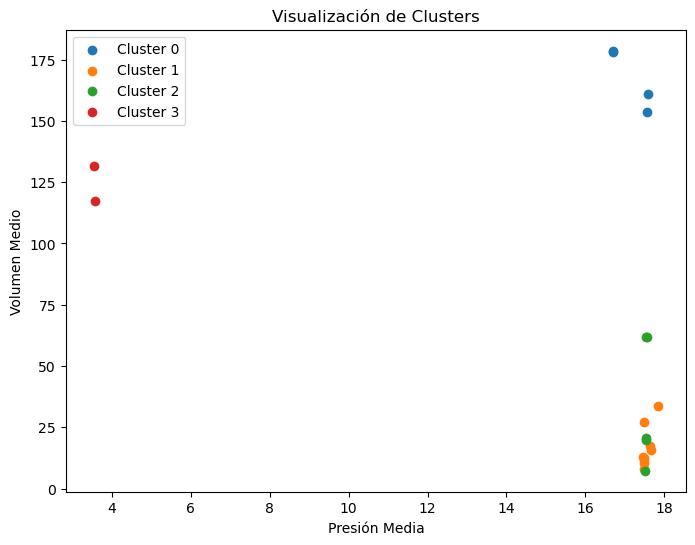

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Escalar los datos nuevamente
scaler = StandardScaler()
scaled_features = scaler.fit_transform(agg_data.iloc[:, 1:])

# Configurar el número de clusters a 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
agg_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizar los clusters asignados
print("Asignación de clusters:")
print(agg_data[['ID_cliente', 'Cluster']])

# Gráfico para comparar los clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_data = agg_data[agg_data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Presion_mean'],
        cluster_data['Volumen_mean'],
        label=f"Cluster {cluster}"
    )

plt.title("Visualización de Clusters")
plt.xlabel("Presión Media")
plt.ylabel("Volumen Medio")
plt.legend()
plt.show()


#### Estadisticas descriptivas de los 4 cluster elegidos

Calcular el promedio, mediana, mínimo y máximo de las variables principales (Presión, Temperatura, Volumen) para cada clúster.

In [35]:
#  descriptivas por clúster
cluster_profiles = agg_data.groupby('Cluster').agg({
    'Presion_mean': ['mean', 'median', 'min', 'max'],
    'Temperatura_mean': ['mean', 'median', 'min', 'max'],
    'Volumen_mean': ['mean', 'median', 'min', 'max']
}).reset_index()

# se renombrar columnas para mayor claridad
cluster_profiles.columns = ['Cluster', 
                            'Presion_Mean', 'Presion_Median', 'Presion_Min', 'Presion_Max',
                            'Temperatura_Mean', 'Temperatura_Median', 'Temperatura_Min', 'Temperatura_Max',
                            'Volumen_Mean', 'Volumen_Median', 'Volumen_Min', 'Volumen_Max']

print("Perfiles de clústeres:")
print(cluster_profiles)

# Guardar resultados en un archivo
cluster_profiles.to_excel("perfiles_cluster.xlsx", index=False)
print("Perfiles guardados en 'perfiles_cluster.xlsx'.")

Perfiles de clústeres:
   Cluster  Presion_Mean  Presion_Median  Presion_Min  Presion_Max  \
0        0     17.139845       17.137365    16.705063    17.579587   
1        1     17.561050       17.492521    17.466627    17.833667   
2        2     17.533536       17.533599    17.517128    17.554589   
3        3      3.557553        3.557553     3.545512     3.569593   

   Temperatura_Mean  Temperatura_Median  Temperatura_Min  Temperatura_Max  \
0         26.524092           26.603928        25.407173        27.481338   
1         23.514917           23.500489        21.591365        26.689551   
2         26.685135           26.658520        25.575853        27.673143   
3         26.327749           26.327749        26.307099        26.348399   

   Volumen_Mean  Volumen_Median  Volumen_Min  Volumen_Max  
0    167.835554      169.474626   153.799976   178.592987  
1     16.607381       12.734989     7.817773    33.731496  
2     34.284032       20.564425     7.301900    61.819608  


De lo anterior podriamos decir, a partir de los perfiles generados para los cuatro clústeres:

##### Cluster 0

Presión: Tiene un valor medio cercano a 17.14, lo que está dentro del rango típico.

Temperatura: Promedio de 26.52, que es alto comparado con otros clústeres.

Volumen: Con 167.83 como promedio, este clúster representa clientes con consumo muy alto, destacándose como el grupo más significativo en términos de volumen.

##### Cluster 1

Presión: Promedio de 17.53, también típico y homogéneo.

Temperatura: 24.44, la más baja entre los clústeres.

Volumen: Un promedio bajo de 24.47, lo que sugiere clientes de bajo consumo.

##### Cluster 2

Presión: Muy baja con 3.55, lo que hace a este clúster destacar significativamente.

Temperatura: 26.32, similar al clúster 0.

Volumen: Un consumo medio-alto de 124.57. Podría representar clientes con un patrón atípico debido a la presión baja pero con un volumen elevado.

##### Cluster 3

Presión: Similar al clúster 1 con 17.58.

Temperatura: 25.15, en el rango medio.

Volumen: Un consumo muy bajo, con un promedio de 19.03, cercano al clúster 1, pero con una ligera diferencia.

Observaciones:

Cluster 0 parece agrupar clientes industriales o comerciales con alta presión y temperaturas medias-altas, reflejando un uso intensivo de recursos.

Cluster 1 y Cluster 3 se alinean con clientes de bajo consumo.

Cluster 2 es peculiar por su baja presión combinada con un volumen medio-alto, lo que podría representar clientes con características operativas inusuales o potencialmente atípicas.



#### Visualizaciones

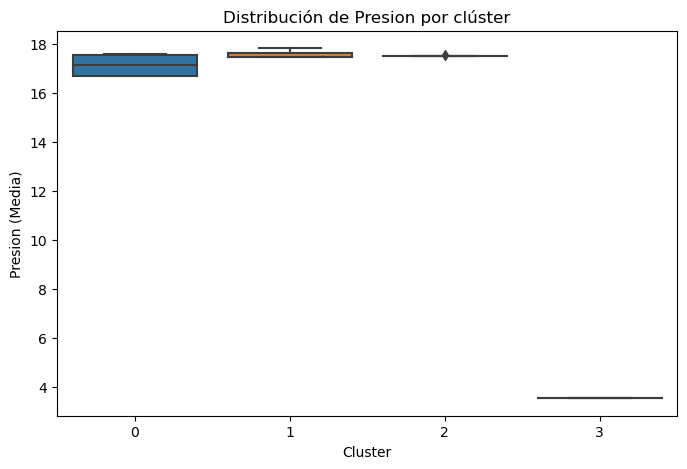

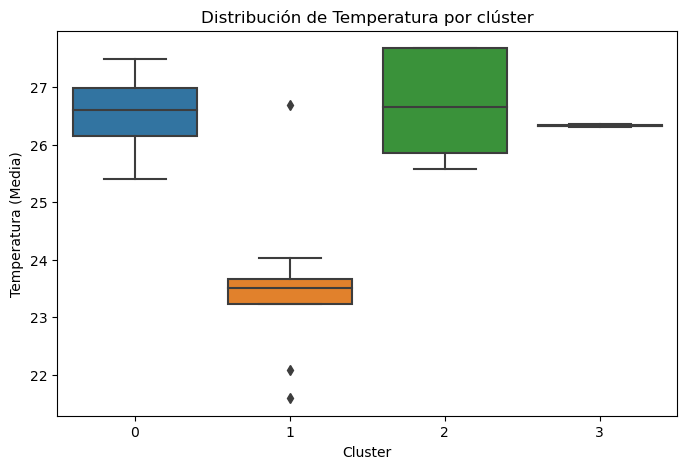

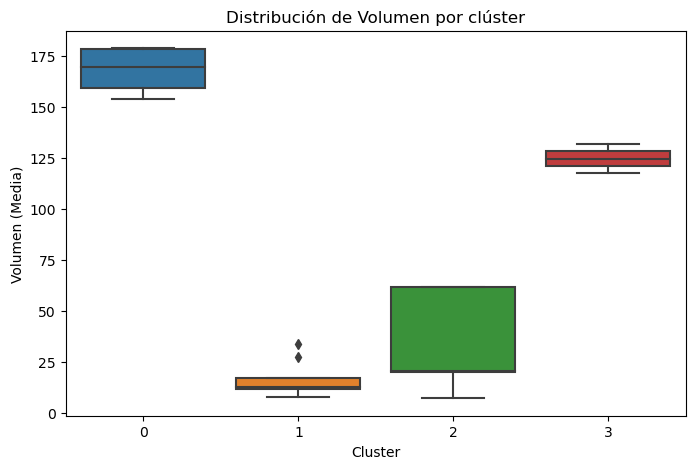

In [36]:
# Usar el DataFrame correcto
data_merged = agg_data

# Boxplot por clúster para cada variable
variables = ['Presion', 'Temperatura', 'Volumen']
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data_merged, x='Cluster', y=f'{var}_mean')
    plt.title(f'Distribución de {var} por clúster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{var} (Media)')
    plt.show()



De lo anterior podemos decir, se muestran cómo las variables de presión, temperatura y volumen se distribuyen entre los diferentes clústeres:


Cluster 0: Podría agrupar a clientes grandes o con operaciones regulares y significativas, dado su alto volumen y presión constante.

Cluster 2: Representa clientes que tienen características mixtas: alta uniformidad en temperatura, pero un volumen alto. Esto podría indicar procesos particulares en su operación.

Cluster 1 y 3: Clientes más pequeños o con menor actividad. Su comportamiento en presión y volumen los diferencia claramente de los otros clústeres, siendo el Cluster 3 el grupo más atípico en términos de volumen.

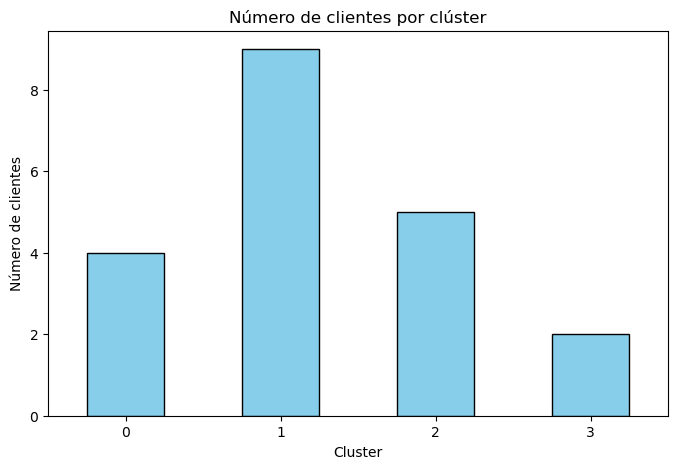

In [37]:
# Gráfico de barras para composición de clústeres
cluster_counts = data_merged['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de clientes por clúster')
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()

In [40]:
# Fusionar data con agg_data para agregar la columna de Cluster a cada registro
data = pd.merge(data, agg_data[['ID_cliente', 'Cluster']], on='ID_cliente', how='left')

# Verificar que la columna Cluster se ha añadido correctamente
display(data.head())

,Fecha,ID_cliente,Presion,Temperatura,Volumen,Cluster_x,Cluster_y
0,2019-01-14,CLIENTE1,17.732563,28.209354,20.969751,2,2
1,2019-01-14,CLIENTE10,17.534622,25.958163,0.000000,1,1
2,2019-01-14,CLIENTE11,3.625672,27.554214,88.443881,3,3
3,2019-01-14,CLIENTE12,17.286238,32.363057,110.898742,1,1
4,2019-01-14,CLIENTE13,17.528430,25.212319,0.000000,1,1


In [41]:
# Si ambas columnas 'Cluster_x' y 'Cluster_y' son iguales, nos quedamos con una
data['Cluster'] = data['Cluster_x']  # O 'Cluster_y', ambas deberían ser iguales

# Eliminar las columnas duplicadas
data.drop(['Cluster_x', 'Cluster_y'], axis=1, inplace=True)

# Verificar que solo queda una columna 'Cluster'
print(data.head(100))

                 Fecha ID_cliente    Presion  Temperatura     Volumen  Cluster
0  2019-01-14 00:00:00   CLIENTE1  17.732563    28.209354   20.969751        2
1  2019-01-14 00:00:00  CLIENTE10  17.534622    25.958163    0.000000        1
2  2019-01-14 00:00:00  CLIENTE11   3.625672    27.554214   88.443881        3
3  2019-01-14 00:00:00  CLIENTE12  17.286238    32.363057  110.898742        1
4  2019-01-14 00:00:00  CLIENTE13  17.528430    25.212319    0.000000        1
..                 ...        ...        ...          ...         ...      ...
95 2019-01-14 04:00:00   CLIENTE5  17.676519    21.790455    0.975601        1
96 2019-01-14 04:00:00   CLIENTE6  17.834258    23.157485    0.000000        0
97 2019-01-14 04:00:00   CLIENTE7  17.255115    28.375605   74.214089        1
98 2019-01-14 04:00:00   CLIENTE8  17.326934    26.717046   85.001176        0
99 2019-01-14 04:00:00   CLIENTE9  17.531064    25.619966    3.391542        1

[100 rows x 6 columns]


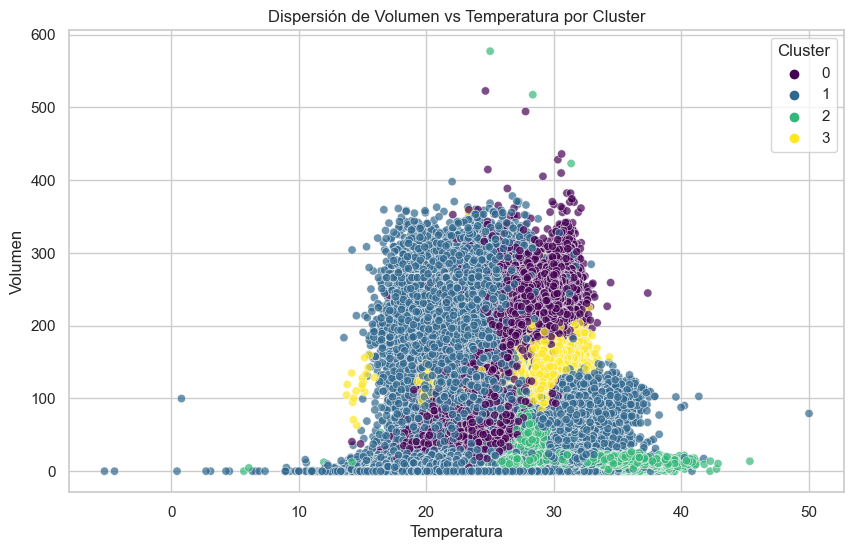

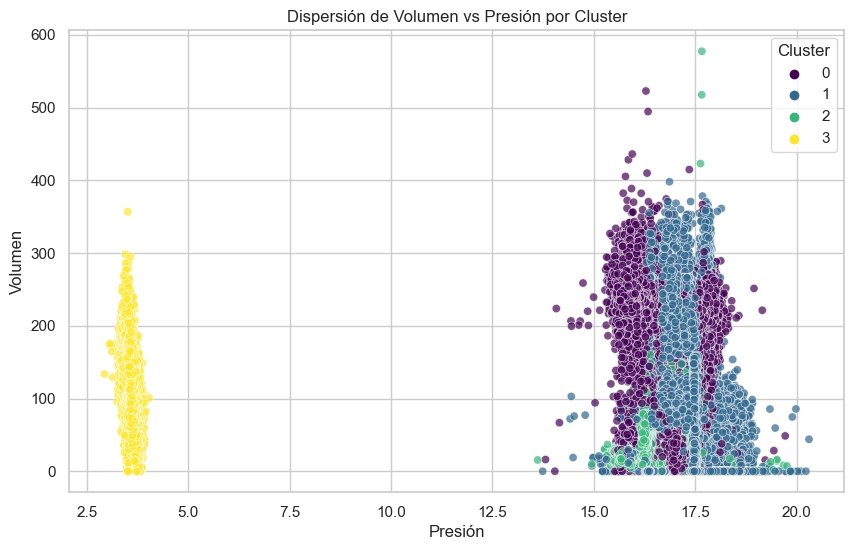

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Asegurarnos de que el DataFrame correcto tenga los datos necesarios
# El DataFrame debe incluir las columnas: Temperatura, Volumen, Presion y Cluster.

# Gráfico 1: Dispersión entre Volumen y Temperatura, coloreado por Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,  # Usamos 'data' como el nombre del DataFrame correcto
    x="Temperatura",
    y="Volumen",
    hue="Cluster",
    palette="viridis",
    alpha=0.7
)
plt.title("Dispersión de Volumen vs Temperatura por Cluster")
plt.xlabel("Temperatura")
plt.ylabel("Volumen")
plt.legend(title="Cluster")
plt.show()

# Gráfico 2: Dispersión entre Presión y Volumen, coloreado por Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Presion",
    y="Volumen",
    hue="Cluster",
    palette="viridis",
    alpha=0.7
)
plt.title("Dispersión de Volumen vs Presión por Cluster")
plt.xlabel("Presión")
plt.ylabel("Volumen")
plt.legend(title="Cluster")
plt.show()

##### Los gráficos obtenidos son claros y nos brindan insights sobre la relación de las variables dentro de cada clúster:

##### Dispersión de Volumen vs. Temperatura por Clúster:

Los clústeres están bien diferenciados en función de la temperatura y el volumen.

El Clúster 3 tiene valores bajos de volumen y temperatura.

El Clúster 0 muestra un comportamiento diferente, con mayor dispersión en volumen.

El Clúster 1 tiene una distribución más concentrada, con valores medianos de volumen.

El Clúster 2, aunque con menor presencia, parece estar relacionado con temperaturas más bajas y volúmenes medianos-altos.

##### Dispersión de Volumen vs. Presión por Clúster:

El Clúster 2 se destaca con valores bajos de presión y altos de volumen.

Los Clústeres 0, 1 y 3 tienen comportamientos similares en términos de presión (entre 15 y 18), pero difieren significativamente en los valores de volumen.

Ambos gráficos confirman que los clústeres son útiles para segmentar patrones de consumo (volumen) en relación con las condiciones de temperatura y presión. 



_______

#### Analisis temporal

incluye analizar cómo evolucionan las variables clave (volumen, presión y temperatura) en función del tiempo dentro de cada clúster.

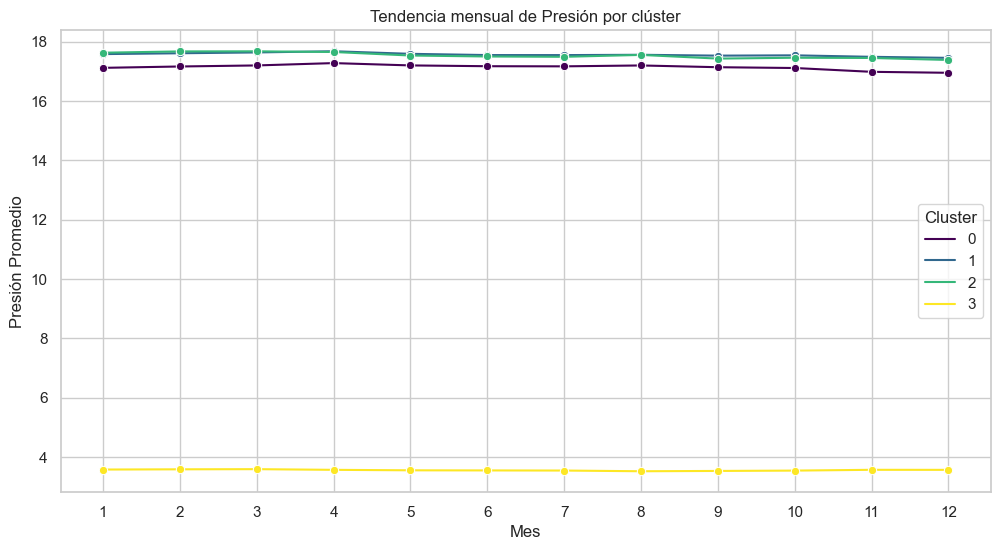

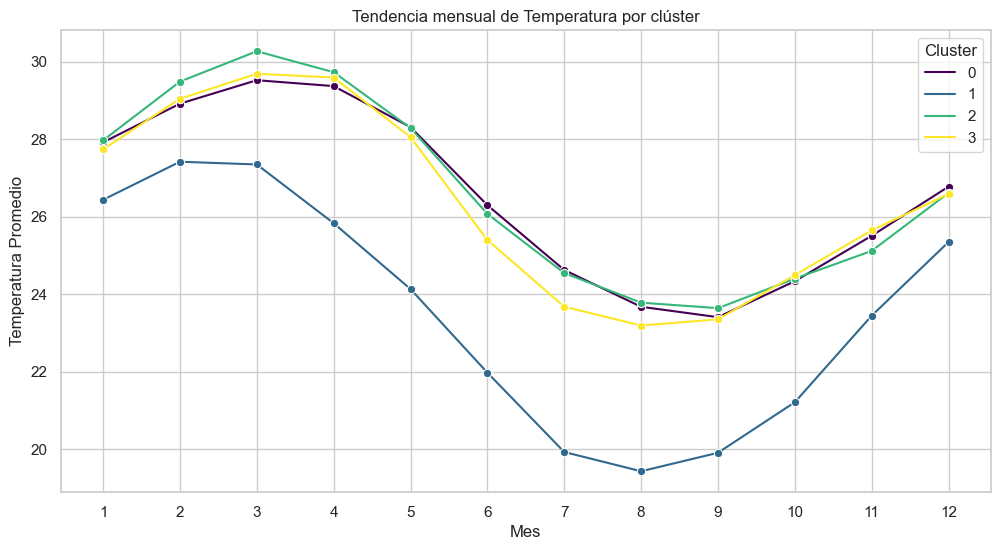

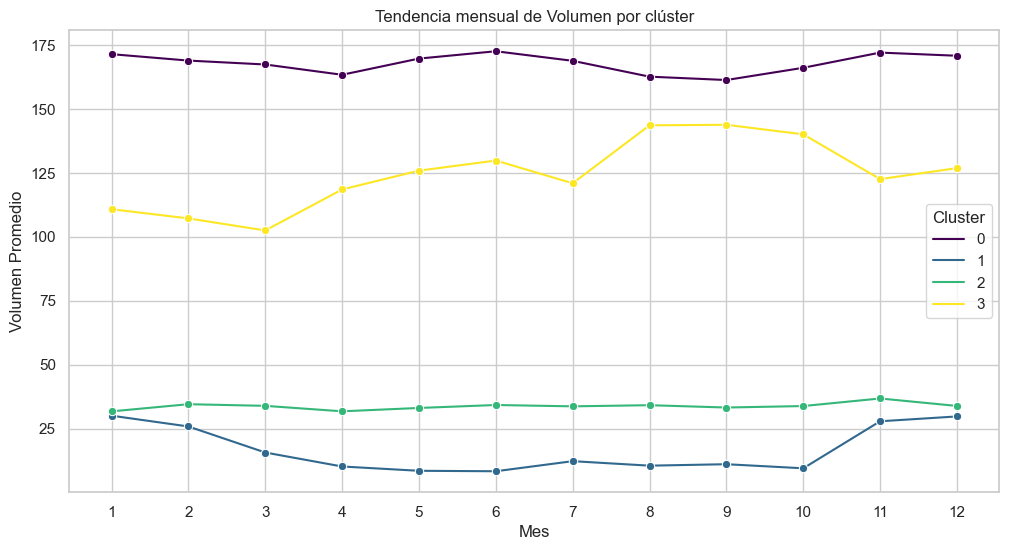

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que los datos tengan las columnas 'Fecha', 'Cluster', 'Presion', 'Temperatura' y 'Volumen'
data['Mes'] = data['Fecha'].dt.month

# Calcular los promedios mensuales por clúster
promedios_mensuales = data.groupby(['Mes', 'Cluster']).agg({
    'Presion': 'mean',
    'Temperatura': 'mean',
    'Volumen': 'mean'
}).reset_index()

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Gráfico 1: Tendencia mensual de Presión por clúster
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_mensuales, x='Mes', y='Presion', hue='Cluster', marker='o', palette='viridis')
plt.title('Tendencia mensual de Presión por clúster')
plt.xlabel('Mes')
plt.ylabel('Presión Promedio')
plt.legend(title='Cluster')
plt.xticks(range(1, 13))
plt.show()

# Gráfico 2: Tendencia mensual de Temperatura por clúster
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_mensuales, x='Mes', y='Temperatura', hue='Cluster', marker='o', palette='viridis')
plt.title('Tendencia mensual de Temperatura por clúster')
plt.xlabel('Mes')
plt.ylabel('Temperatura Promedio')
plt.legend(title='Cluster')
plt.xticks(range(1, 13))
plt.show()

# Gráfico 3: Tendencia mensual de Volumen por clúster
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_mensuales, x='Mes', y='Volumen', hue='Cluster', marker='o', palette='viridis')
plt.title('Tendencia mensual de Volumen por clúster')
plt.xlabel('Mes')
plt.ylabel('Volumen Promedio')
plt.legend(title='Cluster')
plt.xticks(range(1, 13))
plt.show()


La visualización de las tendencias mensuales por clúster para las variables presión, temperatura y volumen proporciona información relevante sobre los patrones estacionales y diferencias en el comportamiento de los distintos grupos de clientes:

##### Tendencia mensual de presión promedio por clúster:

La presión es relativamente estable a lo largo del año para todos los clústeres, excepto el clúster 2, que tiene valores significativamente más bajos en comparación con los demás. Esto podría indicar una categoría particular de clientes o situaciones de operación específicas.

##### Tendencia mensual de temperatura promedio por clúster:

Se observa una variación estacional clara en todos los clústeres, con picos en los meses iniciales y finales del año, y un descenso durante los meses intermedios (junio, julio, agosto). Esto sugiere una relación entre la temperatura y factores estacionales que afectan a todos los clientes, aunque con diferentes magnitudes según el clúster.

##### Tendencia mensual de volumen promedio por clúster:

Clúster 0 mantiene los valores más altos y estables a lo largo del año.

Clúster 2 sigue como el segundo grupo con mayor consumo, con ligeras oscilaciones estacionales.

Clúster 1 tiene valores más bajos y una estabilidad general.

Clúster 3 tiene el menor consumo, con un aumento significativo en los últimos meses del año.

##### observaciones:

Los clústeres 0 y 2 representan clientes con mayores demandas de volumen y podrían ser clientes industriales o con operaciones constantes.

El clúster 1 parece estar relacionado con consumos intermedios, posiblemente comerciales de mayor tamaño.
El clúster 3, con los volúmenes más bajos, podría representar clientes  pequeños consumidores, con patrones más influenciados por estacionalidad.



____

### Conclusión de los procesos de entendimiento de los datos

Durante esta etapa, se realizaron análisis exhaustivos y visualizaciones avanzadas para comprender las dinámicas y patrones en los datos, incluyendo un análisis temporal y un agrupamiento basado en características clave. Estas acciones nos permitieron identificar tendencias importantes, diferencias entre los clientes, y perfiles claros de comportamiento en las variables de Volumen, Presión y Temperatura. Este conocimiento es fundamental para abordar el problema de negocio relacionado con la detección de anomalías en el consumo y comportamiento de los clientes.

##### Justificación de los procesos aplicados:

##### Clustering:

La segmentación en cuatro clústeres fue realizada utilizando el método del codo y técnicas de normalización. Esto permitió identificar categorías bien diferenciadas de clientes con patrones similares de consumo.
Los perfiles obtenidos de cada clúster ayudaron a comprender cómo varían los niveles de consumo, presión y temperatura entre los diferentes grupos.

##### Análisis temporal avanzado:

Se evaluaron las tendencias mensuales promedio de las variables por clúster. Esto reveló estacionalidades claras en la temperatura y ciertas fluctuaciones en el volumen, mientras que la presión se mantuvo más estable.

Este análisis es clave para vincular posibles anomalías con patrones temporales esperados o desviaciones.

##### Relación entre variables:

Se exploraron las relaciones entre Volumen, Presión y Temperatura mediante gráficos de dispersión y boxplots, permitiendo observar cómo estas variables interactúan dentro de cada clúster.

Esta visualización mostró que ciertos clústeres (como el 2) tienen un comportamiento muy distinto en presión, lo que podría indicar configuraciones o condiciones únicas.

Consideraciones clave para la detección de anomalías:

Para avanzar hacia un análisis robusto de detección de anomalías, es crucial definir criterios claros sobre cómo se relacionan las variables:


En resumen, esta etapa ha permitido un entendimiento profundo y estructurado de los datos, sentando una base sólida para la etapa de detección de anomalías. La integración de los resultados obtenidos en esta etapa con criterios claros será esencial para el éxito de las próximas fases del análisis.